In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')
df_can

Data downloaded and read into a dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Preprocessing

In [4]:
df_can.Coverage.unique()

array(['Foreigners', 'Citizens'], dtype=object)

In [5]:
df_can.Coverage.value_counts()

Foreigners    194
Citizens        1
Name: Coverage, dtype: int64

we are going to drop a few columns that are unimportant
`type, coverage, area, dev, reg`

In [6]:
cols_to_drops = ['AREA','DEV','REG','Type','Coverage']
df_can.drop(cols_to_drops, axis=1, inplace=True)

we are also going to rename confusing colums to better names

In [7]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


also we want to make country column as index so that we get better plots

In [8]:
df_can.set_index('Country',inplace=True)

make all columns as string type

In [9]:
df_can.columns = list(map(str, df_can.columns))

we also want to see total immigrants to canada from each country so we create a new column

In [10]:
df_can['Total'] = df_can.sum(axis=1)

# Visualizing the data

In [11]:
years = list(map(str,range(1980,2014)))

In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

In [14]:
df_continents = df_can.groupby('Continent').sum()

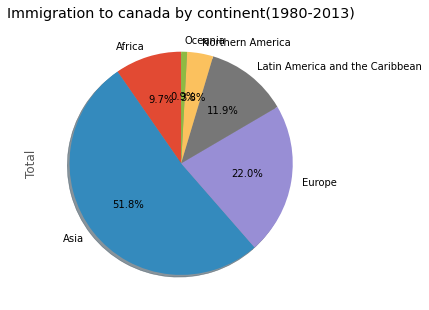

In [15]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%.1f%%',
                            startangle=90,
                            shadow=True)
plt.title("Immigration to canada by continent(1980-2013)")
plt.show()

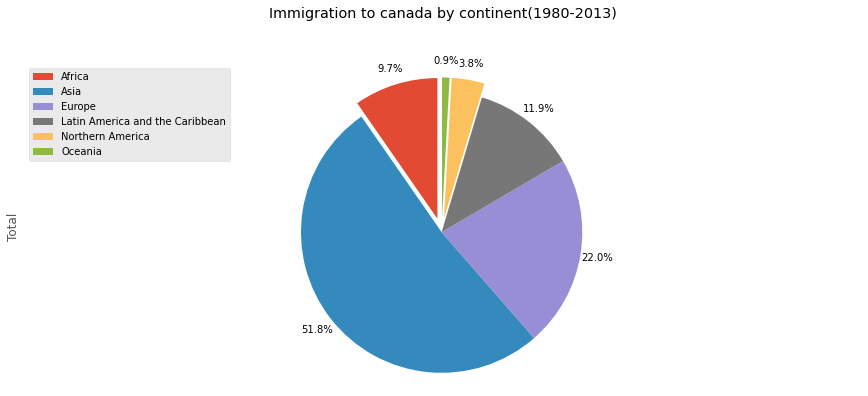

In [16]:
df_continents['Total'].plot(kind='pie',
                            figsize=(15,6),
                            autopct='%.1f%%',
                            startangle=90,
                            labels=None,
                            explode=[.1,0,0,0,.1,.1,],
                            pctdistance=1.12,
                            shadow=False)
plt.title("Immigration to canada by continent(1980-2013)",y=1.12)
plt.legend(labels=df_continents.index, loc='upper left')
plt.axis('equal')
plt.show()

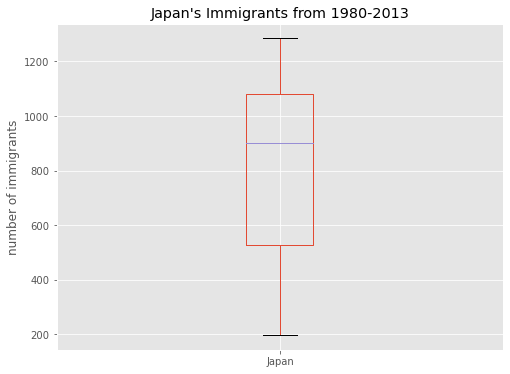

In [17]:
df_can.loc[['Japan'],years].transpose().plot(kind='box',figsize=(8,6))
plt.title("Japan's Immigrants from 1980-2013")
plt.ylabel("number of immigrants")
plt.show()

task
- display box plot of india and china
- display pie charts of 2000 and 1990 immgrant to canada

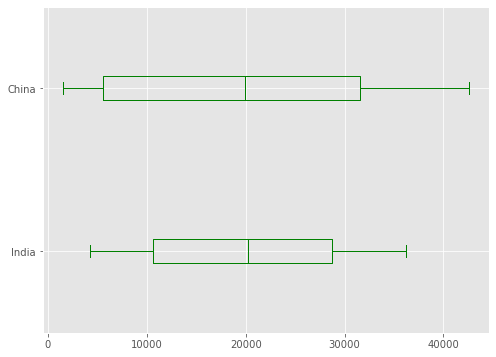

In [20]:
df_can.loc[['India','China'],years].transpose().plot(kind='box',figsize=(8,6),vert=False,color='green')

# subplots

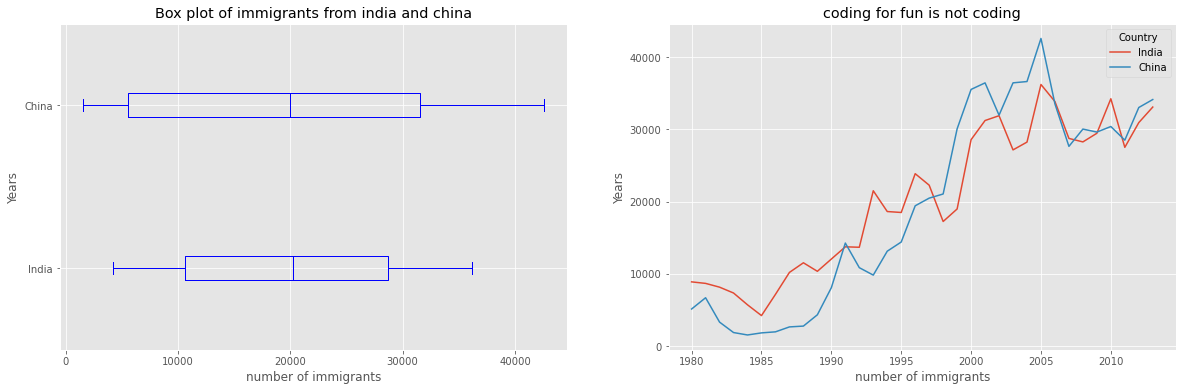

In [27]:
df_IC = df_can.loc[['India','China'],years].transpose()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_IC.plot(kind='box', color='blue', vert=False, figsize=(20,6),ax = ax1)
ax1.set_title('Box plot of immigrants from india and china')
ax1.set_xlabel("number of immigrants")
ax1.set_ylabel("Years")

df_IC.plot(figsize=(20,6),ax=ax2)
ax2.set_title('Box plot of immigrants from india and china')
ax2.set_xlabel("number of immigrants")
ax2.set_ylabel("Years")

plt.show()

In [38]:
df_tot = df_can[years].sum().reset_index()
df_tot.columns = ['Year','Total']
df_tot.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


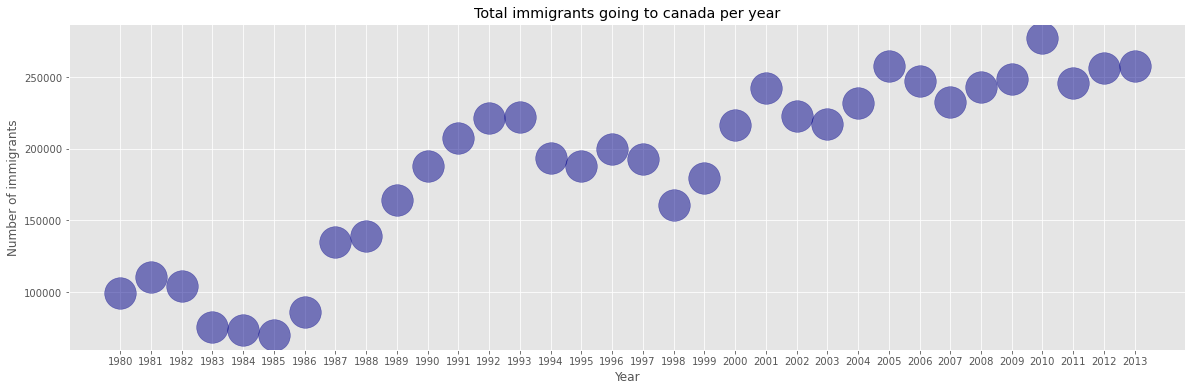

In [42]:
df_tot.plot(kind='scatter',x='Year',y='Total',color='darkblue',figsize=(20,6),s=1000,alpha=.5)
plt.title('Total immigrants going to canada per year')
plt.ylabel("Number of immigrants")
plt.show()

In [46]:
df_can.loc[['Brazil','Argentina'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282


# create a scatter plot for brazil and argentina (task)

In [50]:
df_can.sort_values(by='Total',ascending=False, inplace=True)

In [61]:
df_top5 = df_can.head()

In [62]:
df_top5 = df_top5[years].transpose()
df_top5.rename(columns={"United Kingdom of Great Britain and Northern Ireland":'Uk'},inplace=True)
df_top5.head()

Country,India,China,Uk,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


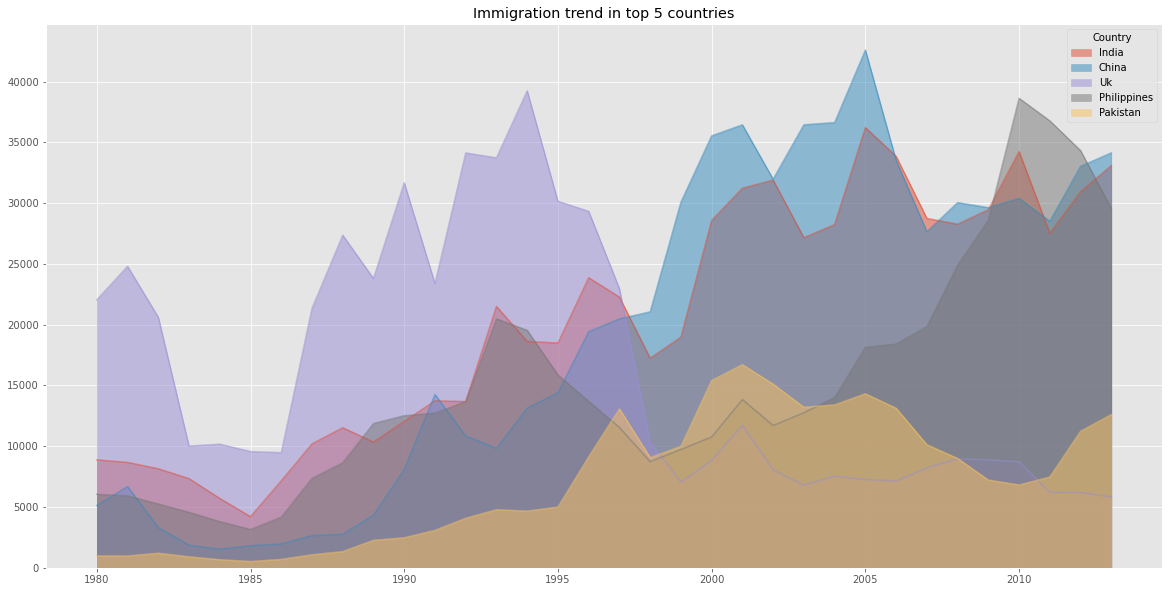

In [64]:
df_top5.plot(kind='area',stacked=False, figsize=(20,10),title='Immigration trend in top 5 countries')
plt.show()

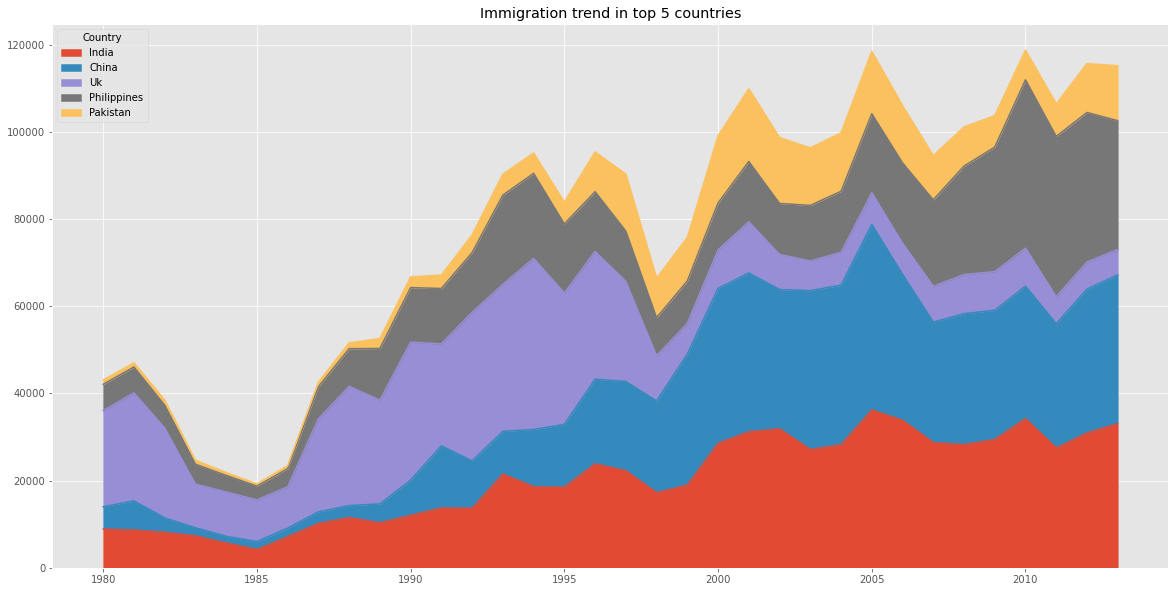

In [65]:
df_top5.plot(kind='area', figsize=(20,10),title='Immigration trend in top 5 countries')
plt.show()

In [74]:
df_ice = df_can.loc['Iceland',years]

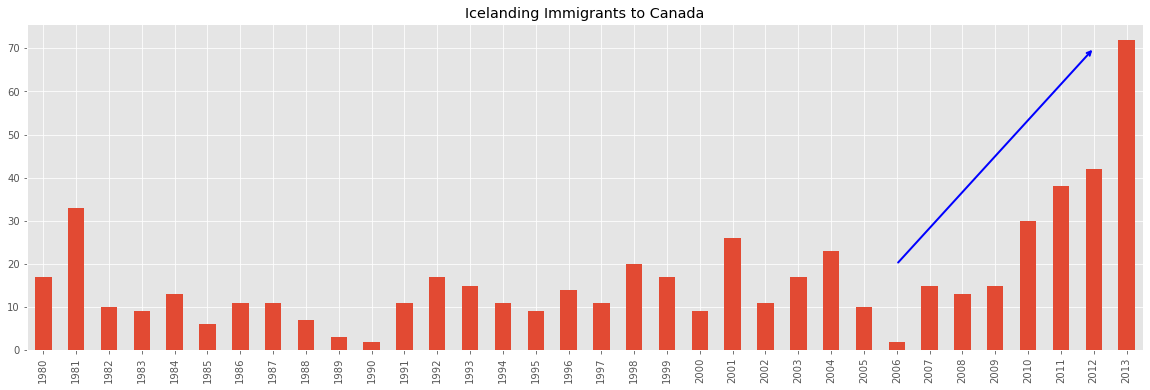

In [79]:
df_ice.plot(kind='bar',figsize=(20,6),title='Icelanding Immigrants to Canada')
plt.annotate('',
            xy=(32,70),
            xytext=(26,20),
            xycoords="data",
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw=2)
            )
plt.show()